In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [29]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
## 데이터 읽어오기.
raw_df = pd.read_csv("/content/drive/MyDrive/house_price_of_unit_area.csv")

print(raw_df.info())
print(raw_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB
None
   house age  distance to the nearest MRT station  \
0       32.0                             84.87882   
1       19.5                            306.59470   
2       13.3                            561.98450   
3       13.3                            561.98450   
4        5.0                            390.568

In [39]:
dataset=raw_df.copy()

dataset_stats =dataset.describe() # 기술통계
dataset_stats.pop("house price of unit area")
dataset_stats = dataset_stats.transpose()

label_data=dataset.pop('house price of unit area')

def min_max_norm(x):
  return (x - dataset_stats['min'] ) / ( dataset_stats['max']- dataset_stats['min'])

normed_train_data = min_max_norm(dataset) # 0 ~ 1사이의 값으로 정규화를 완료

In [41]:
# 모델의 설정
input_Layer = tf.keras.layers.Input(shape=(5,))
x = tf.keras.layers.Dense(120, activation='sigmoid')(input_Layer)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_28 (Dense)            (None, 120)               720       
                                                                 
 dense_29 (Dense)            (None, 100)               12100     
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23021 (89.93 KB)
Trainable params: 23021 (89.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# def standard_norm(x):
#   return (x - dataset_stats[mean] ) / (dataset_stats[std])

In [21]:
# min_max_norm_train_data = min_max_norm(dataset)
# standard_norm_train_data = standard_norm(dataset)

KeyError: 'mean'

In [42]:
## regression이므로 평가 지표는 MSE가 된다.
model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

result=model.fit(normed_train_data, label_data, epochs=2000, batch_size=100)
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())

Epoch 1/2000
5/5 [==============================] - 1s 4ms/step - loss: 779.1647 - root_mean_squared_error: 27.9135
Epoch 2/2000
5/5 [==============================] - 0s 4ms/step - loss: 197.9917 - root_mean_squared_error: 14.0710
Epoch 3/2000
5/5 [==============================] - 0s 3ms/step - loss: 185.6877 - root_mean_squared_error: 13.6267
Epoch 4/2000
5/5 [==============================] - 0s 3ms/step - loss: 186.1500 - root_mean_squared_error: 13.6437
Epoch 5/2000
5/5 [==============================] - 0s 4ms/step - loss: 191.3723 - root_mean_squared_error: 13.8337
Epoch 6/2000
5/5 [==============================] - 0s 6ms/step - loss: 191.0302 - root_mean_squared_error: 13.8214
Epoch 7/2000
5/5 [==============================] - 0s 5ms/step - loss: 193.9463 - root_mean_squared_error: 13.9265
Epoch 8/2000
5/5 [==============================] - 0s 5ms/step - loss: 185.5144 - root_mean_squared_error: 13.6204
Epoch 9/2000
5/5 [==============================] - 0s 5ms/step - loss: 

13/13 [==============================] - 0s 3ms/step - loss: 63.0246 - root_mean_squared_error: 7.9388

 Test rmse: 7.9388


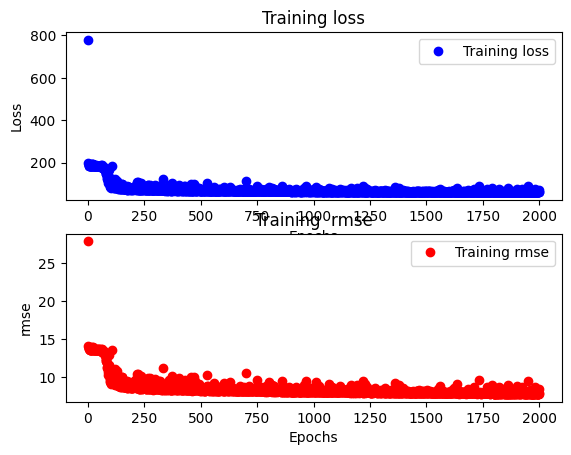

In [43]:
### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.title('Training  rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(normed_train_data, label_data)[1]))

plt.show()